# Statistics fundamentals demo: data types

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Load weather dataset

In [2]:
url = 'https://gperdrizet.github.io/FSA_devops/assets/data/unit2/weather.csv'
df = pd.read_csv(url)
df.head()

,weather_condition,wind_strength,temperature_c,rainfall_inches,humidity_percent,pressure_hpa
0,Sunny,Light Breeze,8.2,0.13,48.8,1016.5
1,Snowy,Gale,1.6,0.29,89.6,1009.4
2,Rainy,Strong Wind,7.3,0.01,100.0,1003.3
3,Cloudy,Light Breeze,21.6,0.62,49.3,1006.9
4,Sunny,Calm,12.0,1.09,38.6,1016.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   weather_condition  365 non-null    object 
 1   wind_strength      365 non-null    object 
 2   temperature_c      365 non-null    float64
 3   rainfall_inches    365 non-null    float64
 4   humidity_percent   365 non-null    float64
 5   pressure_hpa       365 non-null    float64
dtypes: float64(4), object(2)
memory usage: 17.2+ KB


## Statistical data types

### 1. Discrete vs continuous random variables

Before discussing measurement scales, let's understand the fundamental distinction between discrete and continuous variables.

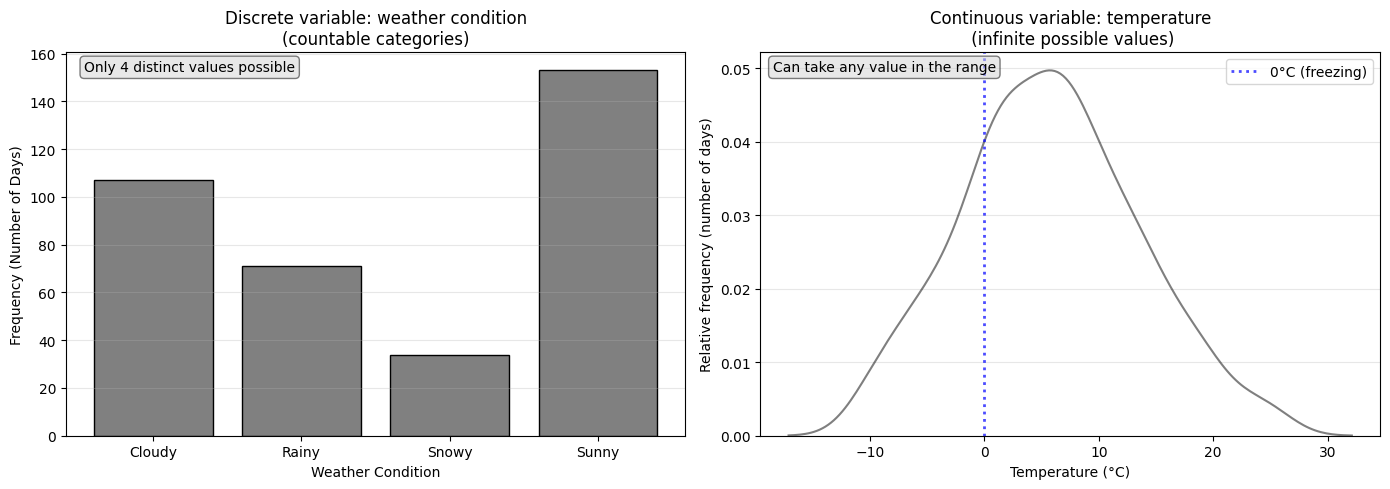

In [4]:
def variables_plot():
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Bar chart for weather condition (categorical discrete)
    weather_counts = df['weather_condition'].value_counts().sort_index()

    axes[0].set_title('Discrete variable: weather condition\n(countable categories)')
    axes[0].bar(weather_counts.index, weather_counts.values, color='grey', edgecolor='black')
    axes[0].set_xlabel('Weather Condition')
    axes[0].set_ylabel('Frequency (Number of Days)')
    axes[0].grid(True, alpha=0.3, axis='y')

    # Add text annotation
    axes[0].text(0.2, 0.95, 'Only 4 distinct values possible', 
                transform=axes[0].transAxes, ha='center', 
                bbox=dict(boxstyle='round', facecolor='lightgrey', alpha=0.5))

    # KDE for temperature (continuous variable)
    axes[1].set_title('Continuous variable: temperature\n (infinite possible values)')
    sns.kdeplot(x='temperature_c', data=df, ax=axes[1], color='black', alpha=0.5)
    axes[1].set_xlabel('Temperature (°C)')
    axes[1].set_ylabel('Relative frequency (number of days)')
    axes[1].grid(True, alpha=0.3, axis='y')
    axes[1].axvline(0, color='blue', linestyle=':', linewidth=2, alpha=0.7, label='0°C (freezing)')
    axes[1].legend()

    # Add text annotation
    axes[1].text(0.2, 0.95, 'Can take any value in the range', 
                transform=axes[1].transAxes, ha='center',
                bbox=dict(boxstyle='round', facecolor='lightgrey', alpha=0.5))

    plt.tight_layout()
    plt.show()

variables_plot()

### 2. Measurement scales (types of data)

**Nominal data**

In [5]:
df['weather_condition'].value_counts()

weather_condition
Sunny     153
Cloudy    107
Rainy      71
Snowy      34
Name: count, dtype: int64

**Ordinal data**

In [6]:
df['wind_strength'].value_counts()

wind_strength
Light Breeze     121
Moderate Wind     98
Calm              66
Strong Wind       55
Gale              25
Name: count, dtype: int64

**Interval data**

Temperature in Celsius is interval data because 0°C doesn't mean "no temperature" - it's just the freezing point of water. The temperature can go below 0°C (negative values are valid), and ratios are not meaningful: 20°C is not "twice as hot" as 10°C.

In [7]:
df['temperature_c'].describe().loc[['min', 'mean', 'max']]

min    -10.000000
mean     5.753425
max     25.000000
Name: temperature_c, dtype: float64

**Ratio data**

In [8]:
df['rainfall_inches'].describe().loc[['min', 'mean', 'max']]

min     0.000000
mean    0.303699
max     2.230000
Name: rainfall_inches, dtype: float64